# Wiederholungsaufgabe

<img align="right" width="400" alt="Penguins" src="https://balloon.tam.ch/share/5964b385a6194f09d3bf00250f469706" />

Als Pinguin-Forscher:in befinden Sie sich gerade auf einer Antarktis-Expedtion. Ihr Forschungsthema sind die Körpermasse von Adelie-, Gentoo- und Chinstrap-Pinguinen. Ihre Messdaten haben Sie im Datensatz `penguins.csv` festgehalten. Diese gilt es nun auszuwerten.

Importieren Sie als erstes den Datensatz mit Hilfe von pandas.

In [19]:
import pandas as pd
penguins = pd.read_csv('./datasets/penguins.csv')

### Aufgabe 1

**a)** Geben Sie die ersten fünf Zeilen des Datensatzes aus.

In [20]:
# Hier Code eingeben
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,38.9,18.4,191,3706,MALE
4,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE


**b)** Was für Pinguinarten sind im Datensatz enthalten? Verwenden Sie eine Aggregationsfunktion.

In [21]:
# Hier Code eingeben
penguins["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

__c)__ Erstellen Sie im DataFrame `penguins` eine neue Spalte `body_mass_lb`, die das Körpergewicht in Pfund (pounds, lb) statt Gramm enthält. Rechnen Sie das Gewicht mit der Formel ${\rm lb} \approx {\rm g} \times 0.00220462$ um.

In [22]:
def gram_to_pounds(gram):
    return gram * 0.00220462

penguins["body_mass_lb"] = penguins["body_mass_g"].apply(gram_to_pounds)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_lb
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE,8.267325
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE,8.377556
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE,7.165015
3,Adelie,Torgersen,38.9,18.4,191,3706,MALE,8.170322
4,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE,7.605939


**d)** Filtern Sie den Datensatz nach der Spezies `Gentoo` und weisen Sie das Resultat der Variablen `gentoo` zu.

In [23]:
# Hier Code eingeben
gentoo = penguins[penguins["species"] == "Gentoo"]

gentoo.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_lb
220,Gentoo,Biscoe,46.1,13.2,211,4500,FEMALE,9.920790
221,Gentoo,Biscoe,50.0,16.3,230,5700,MALE,12.566334
222,Gentoo,Biscoe,48.7,14.1,210,4450,FEMALE,9.810559
223,Gentoo,Biscoe,50.0,15.2,218,5700,MALE,12.566334
224,Gentoo,Biscoe,47.6,14.5,215,5400,MALE,11.904948


**e)** Berechnen Sie das durchschnittliche Körpergewicht von `Gentoo`-Pinguinen.

In [24]:
# Hier Code eingeben
avg_gentoo_mass = gentoo["body_mass_g"].mean()

avg_gentoo_mass

np.float64(5076.0161290322585)

### Aufgabe 2

In dieser Aufgabe geht es darum, das Gewicht (`body_mass_g`) von **Gentoo-Pinguinen** über ihre Schnabellänge (`bill_length_mm`) und ihre Schnabeltiefe (`bill_depth_mm`) vorauszusagen.

**a)** Überprüfen Sie die Linearität zwischen den unabhängigen und der abhängigen Variablen mit Hilfe von matplotlib-Streudiagrammen.

**Wichtig**: Beschränken Sie sich auf `Gentoo`-Pinguine.

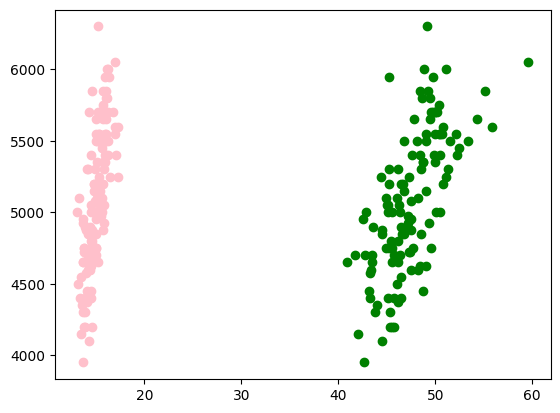

In [25]:
import matplotlib.pyplot as plt


plt.scatter(gentoo["bill_length_mm"], gentoo["body_mass_g"], color="green")
plt.scatter(gentoo["bill_depth_mm"], gentoo["body_mass_g"], color="pink")

plt.show()

**Streudiagramm 1**: x-Achse = Schnabellänge, y-Achse = Gewicht

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

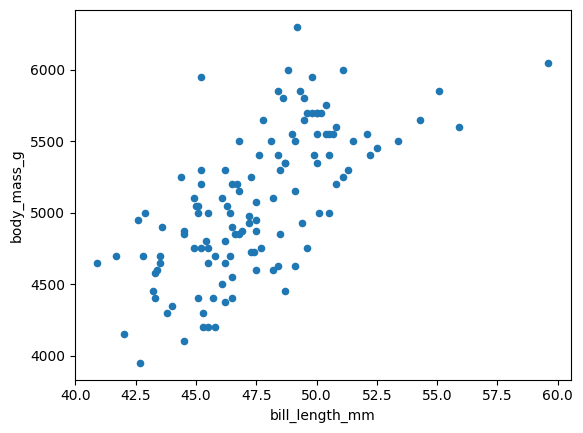

In [26]:
# Hier Code eingeben
gentoo.plot.scatter("bill_length_mm", "body_mass_g")

**Streudiagramm 2**: x-Achse = Schnabeltiefe, y-Achse = Gewicht

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

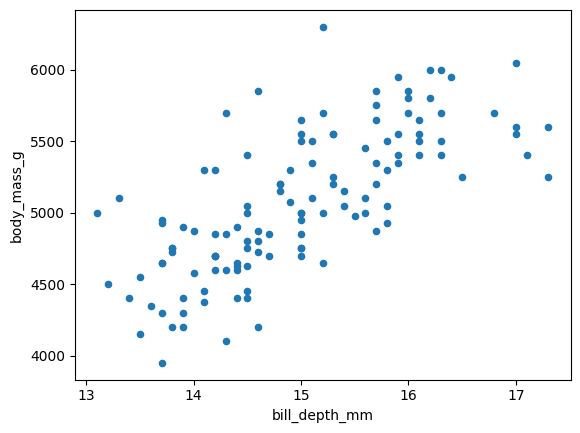

In [27]:
# Hier Code eingeben
gentoo.plot.scatter("bill_depth_mm", "body_mass_g")

**b)** Erstellen Sie mit Hilfe von statsmodels ein lineares Modell $y = f(x_1, x_2) = a_0 + a_1 x_1 + a_2 x_2$, welches über die Schnabellänge $x_1$ und die Schnabeltiefe $x_2$ das Körpergewicht $y$ eines Gentoo-Pinguin voraussagt.

Bestimmen Sie mit Hilfe der lineare Regression die Koeffizienten $a_0$, $a_1$ und $a_2$.

**Wichtig**: Beschränken Sie sich auf Gentoo-Pinguine.

In [28]:
import statsmodels.formula.api as smf # statsmodels als smf importieren

In [29]:
# Hier Code eingeben
model = smf.ols(formula="body_mass_g ~ bill_depth_mm + bill_length_mm", data=gentoo).fit()

**c)** Um wie viel Gramm nimmt im Schnitt das Gewicht mit jedem zusätzlichen Millimeter Schnabellänge zu?

In [30]:
print(model.params["bill_length_mm"])

57.6466740178322


**d)** Sagen Sie mit Hilfe des linearen Modells das Körpergewicht eines Gentoo-Pinguins mit einer Schnabellänge von 50 mm und einer Schnabeltiefe von 16 mm voraus.

In [31]:
df = pd.DataFrame({'bill_length_mm': [50], 'bill_depth_mm': [16]})
# Hier Code eingeben

print(model.predict(df))

0    5477.480902
dtype: float64
